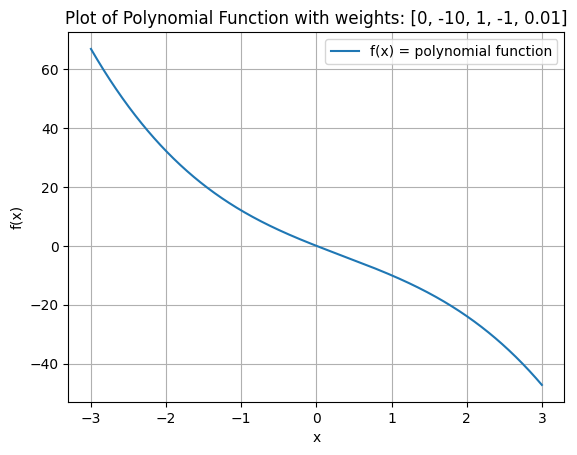

QUESTION 4 ------------------------------------




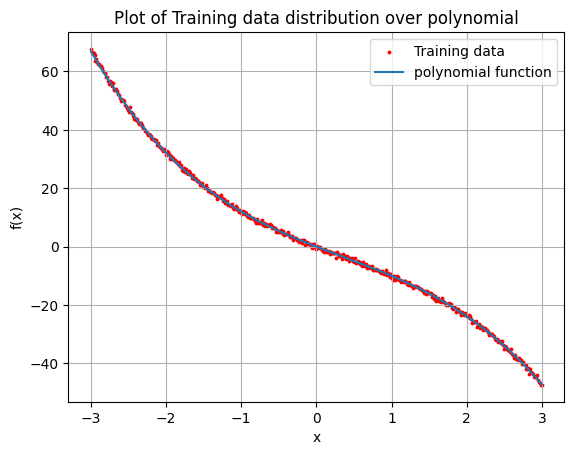

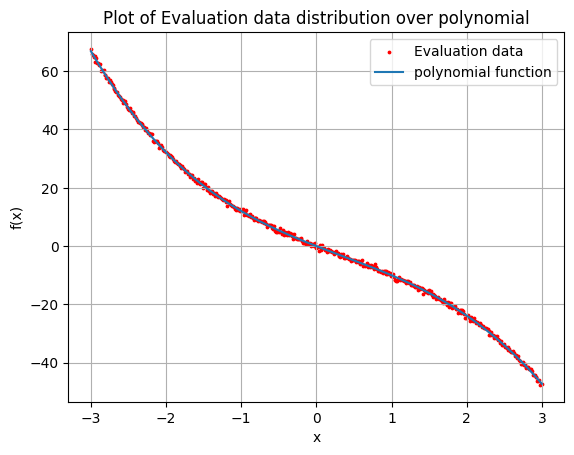

QUESTION 5 ------------------------------------


step:  100 : 
 train loss: [ 36.7601318359375 ]
 eval loss: [ 36.68885040283203 ] 
 weights:   [-0.13159428536891937, -1.3574025630950928, 0.4614560306072235, -2.3441410064697266, 0.08878766000270844]
step:  200 : 
 train loss: [ 30.323436737060547 ]
 eval loss: [ 30.265548706054688 ] 
 weights:   [-0.05254713445901871, -2.133340358734131, 0.5978297591209412, -2.223381280899048, 0.06759173423051834]
step:  300 : 
 train loss: [ 25.07560157775879 ]
 eval loss: [ 25.028234481811523 ] 
 weights:   [0.0021932031959295273, -2.8395519256591797, 0.6950534582138062, -2.1134729385375977, 0.05251653119921684]
step:  400 : 
 train loss: [ 20.770586013793945 ]
 eval loss: [ 20.731637954711914 ] 
 weights:   [0.03978564217686653, -3.482304573059082, 0.7645459175109863, -2.0134406089782715, 0.04177530109882355]
step:  500 : 
 train loss: [ 17.225555419921875 ]
 eval loss: [ 17.193437576293945 ] 
 weights:   [0.06529325991868973, -4.067298412322998, 0

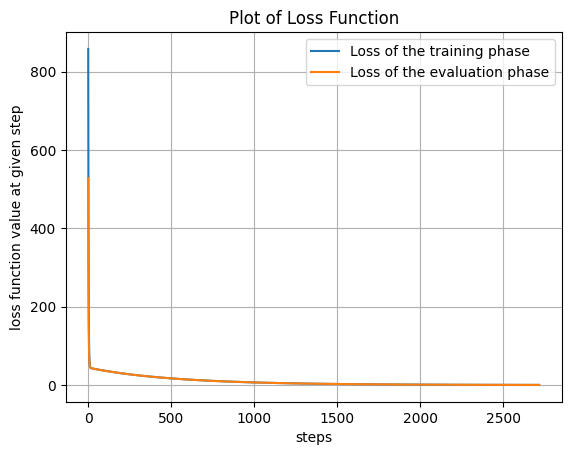

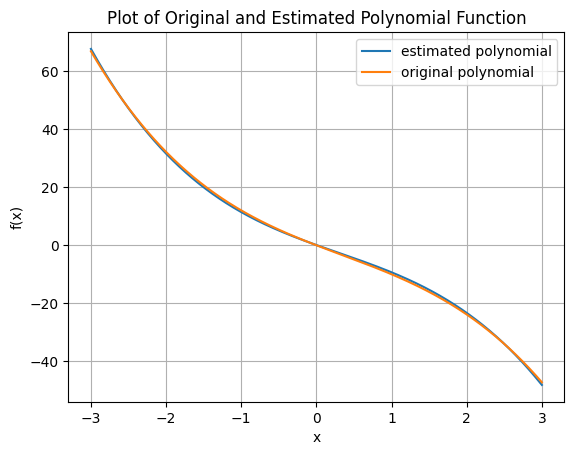

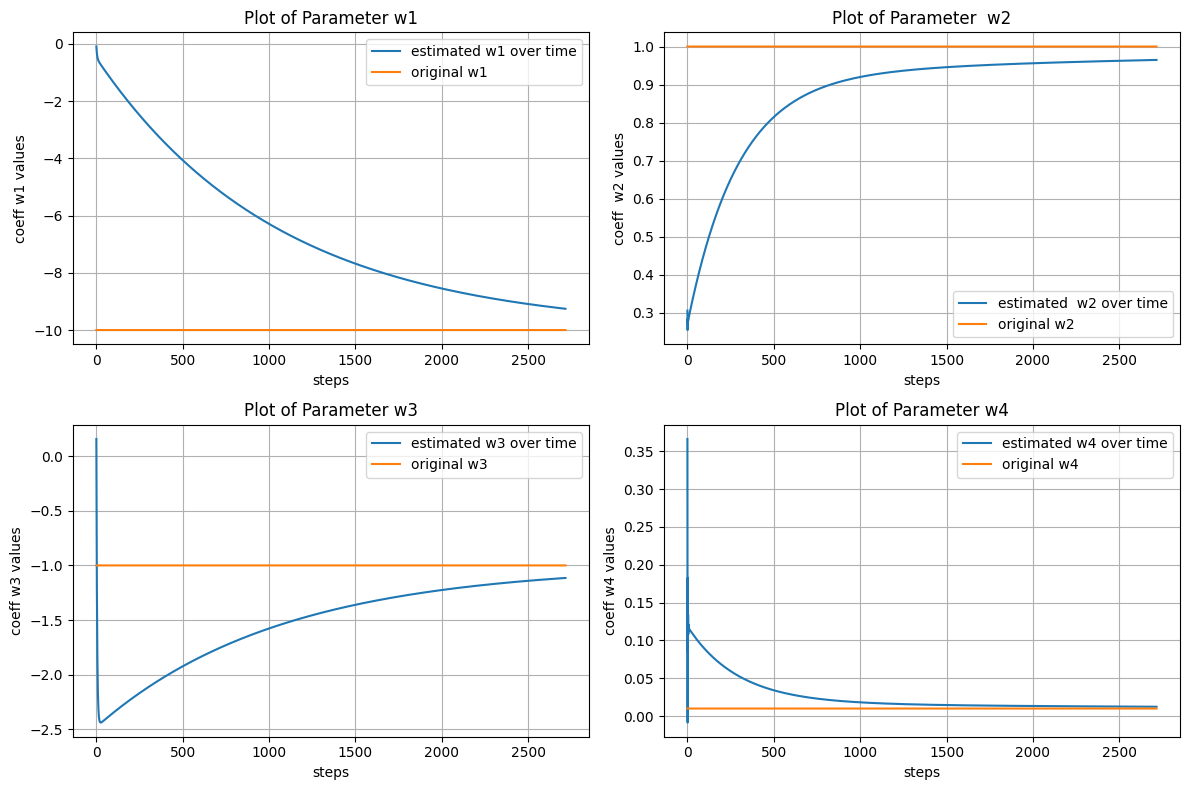

QUESTION 9 ------------------------------------


step:  0 : 
 train loss: [ 909.48486328125 ]
 eval loss: [ 382.32794189453125 ] 
 weights:   [0.276963472366333, -0.19568295776844025, 0.08379349112510681, -0.9513806700706482, -0.18756087124347687]
step:  1 : 
 train loss: [ 519.1351928710938 ]
 eval loss: [ 449.6294250488281 ] 
 weights:   [0.29300960898399353, -0.26994073390960693, 0.19894711673259735, -1.4375067949295044, 0.7344624996185303]
step:  2 : 
 train loss: [ 773.5707397460938 ]
 eval loss: [ 1362.4375 ] 
 weights:   [0.2641542851924896, -0.3204423189163208, -0.028171485289931297, -1.7425893545150757, -1.152464509010315]
step:  3 : 
 train loss: [ 2584.0029296875 ]
 eval loss: [ 5182.12548828125 ] 
 weights:   [0.32711949944496155, -0.3560064435005188, 0.4447351098060608, -1.9338663816452026, 2.705833911895752]
step:  4 : 
 train loss: [ 10452.7158203125 ]
 eval loss: [ 21721.724609375 ] 
 weights:   [0.20226417481899261, -0.38217660784721375, -0.5141717195510864, -2.053604

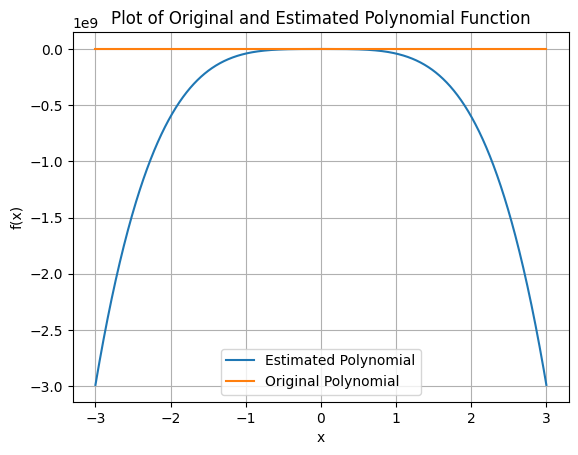

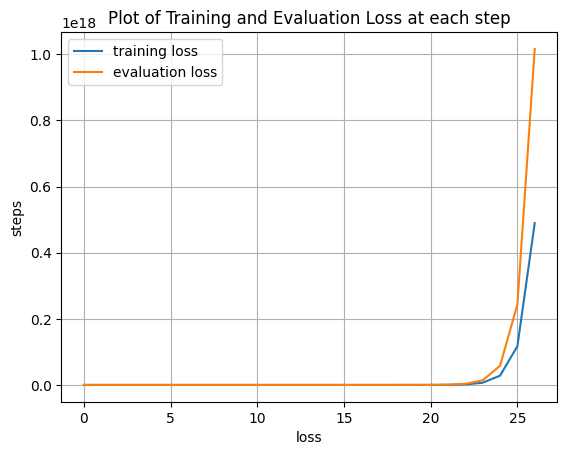

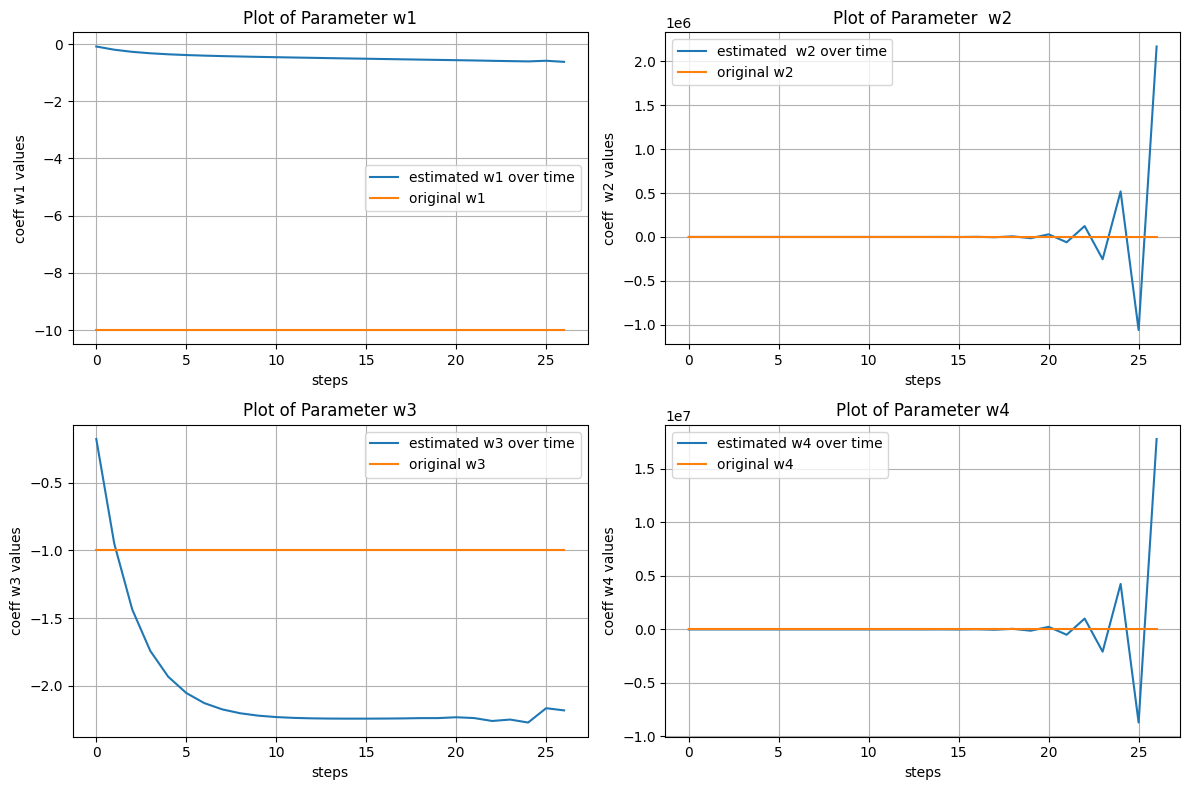

INFOs ON TRAINING AND EVALUATION WITH DATALOADER-------------------------


step:  2 training loss:[ 40.61715316772461 ] 
 loss eval: [ 45.72693634033203 ] 
 weights:   [-0.20988059043884277, -1.3573154211044312, 0.008406497538089752, -2.3887710571289062, 0.25628146529197693]
step:  4 training loss:[ 23.309249877929688 ] 
 loss eval: [ 47.066349029541016 ] 
 weights:   [-0.11520887166261673, -1.8540058135986328, 0.17152689397335052, -2.262204885482788, 0.2661488950252533]
step:  6 training loss:[ 47.94167709350586 ] 
 loss eval: [ 29.924152374267578 ] 
 weights:   [-0.03484797105193138, -2.3306660652160645, 0.29137685894966125, -2.179110288619995, 0.14067240059375763]
step:  8 training loss:[ 44.640220642089844 ] 
 loss eval: [ 84.39313507080078 ] 
 weights:   [0.010949217714369297, -2.8097293376922607, 0.34002915024757385, -2.2269845008850098, -0.17546936869621277]
step:  10 training loss:[ 32.31658935546875 ] 
 loss eval: [ 40.074867248535156 ] 
 weights:   [0.08600227534770966, -3.2

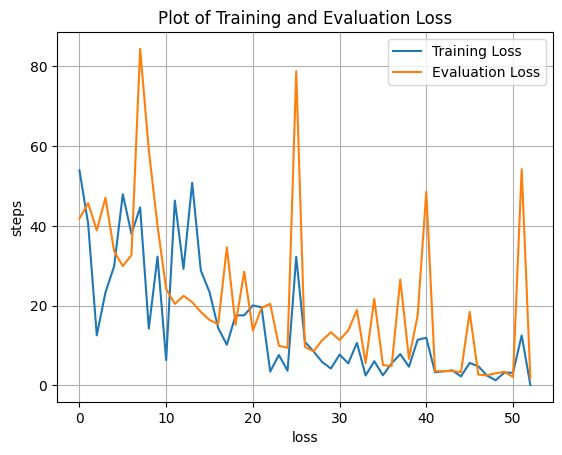

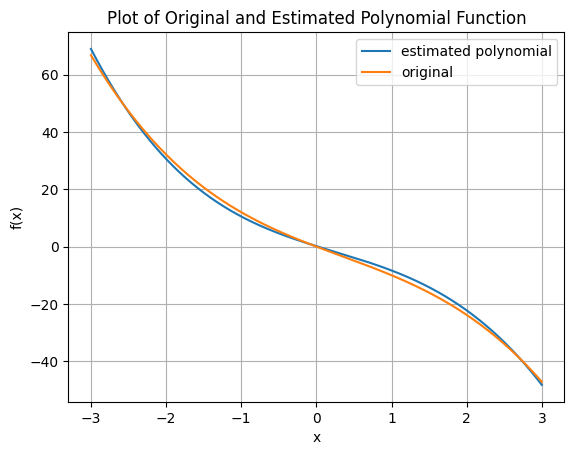

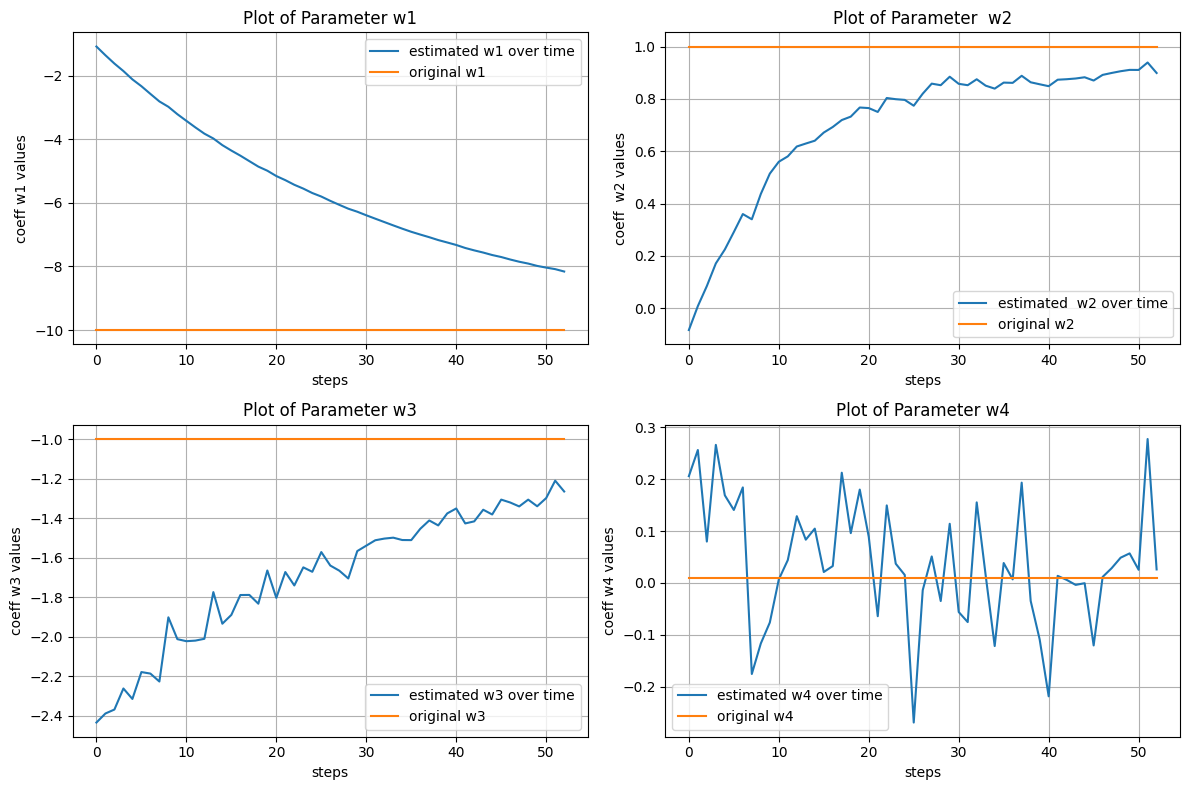

In [1]:
'''
Assignment 1: Polynomial Regression
Student: PIETRO MIOTTO
'''
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import platform
import torch.optim as optim
import numpy as np
import math


# *** Question 1 **
def f(x, coeffs):
    s = 0
    for i, coeff in enumerate(coeffs):
        s = s + (coeff * (x ** i))
    return s


def plot_polynomial(coeffs, z_range, color='b', toprint=True, label=''):
    x = np.linspace(z_range[0], z_range[1], 1000)
    y = np.array([f(i, coeffs) for i in x])
    # y = np.array([np.dot(coeffs, [i**0, i**1, i**2, i**3, i**4] ) for i in x])
    rounded_coeffs = [round(num, 3) for num in coeffs]
    if (toprint == True):
        plt.plot(x, y, label='f(x) = polynomial function')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title(f'Plot of Polynomial Function with weights: {rounded_coeffs}')
        plt.legend()
        plt.grid(True)
        plt.show()
        return 0
    else:
        return plt.plot(x, y, label=label)


# *** Question 2 **
def create_dataset(coeffs, z_range, sample_size, sigma, seed=42):
    np.random.seed(seed)
    x = np.linspace(z_range[0], z_range[1], sample_size)
    y = np.array([f(i, coeffs) for i in x]) + np.random.normal(0, sigma, sample_size)
    dataset = [[x[i], y[i]] for i in range(sample_size)]
    return x, y


# *** Question 4 **
def visualize_data(X, y, coeffs, z_range, title=""):
    plt.scatter(X, y, label=title, color='r', s=3)
    plot_polynomial(coeffs, z_range, toprint=False, label='polynomial function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Plot of {title} distribution over polynomial')
    plt.legend()
    plt.grid(True)
    plt.show()


# *** Plot_Loss (Question 6) **
def plot_loss(loss, steps, toprint=True, label=''):
    if (toprint == True):
        plt.plot(steps, loss, label=label)
        plt.xlabel('steps')
        plt.ylabel('loss')
        plt.title('Plot of Loss Function')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        return plt.plot(steps, loss, label=label)


# *** Plot_parameters (Question 8) **

def plot_parameters(parameters, steps, original_parameters):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    w_labels = ['w1', ' w2', 'w3', 'w4']
    original_labels = ['original w1', 'original w2', 'original w3', 'original w4']

    for i in range(4):
        w = [x[i + 1] for x in parameters]
        original = [original_parameters[i + 1] for _ in range(len(steps))]

        row, col = i // 2, (i) % 2
        ax = axes[row, col]

        ax.plot(steps, w, label=f'estimated {w_labels[i]} over time')
        ax.plot(steps, original, label=original_labels[i])
        ax.set_xlabel('steps')
        ax.set_ylabel(f'coeff {w_labels[i]} values')
        ax.set_title(f'Plot of Parameter {w_labels[i]}')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()


# *** DataSet Class **
class MyDataset(Dataset):
    def __init__(self, coeffs, z_range, sample_size, sigma, seed, device):
        x, y = create_dataset(coeffs, z_range, sample_size, sigma, seed=42)
        self.data = torch.tensor(np.array([x ** i for i in range(5)]), dtype=torch.float32).t().to(device)
        self.target = torch.tensor(y.reshape(sample_size, 1), dtype=torch.float32).to(device)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data = self.data[idx]
        target = self.target[idx]
        return data, target


# *** Model Class **
class PolModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolModel, self).__init__()

        self.fc = nn.Linear(input_dim, output_dim, bias=False)
        self.weight = self.fc.weight

    def forward(self, x):
        return self.fc(x)


# *** MAIN **
if __name__ == "__main__":

    # Here I define some useful variables
    coeffs = [0, -10, 1, -1, 0.01]
    z_range = [-3, 3]

    # Here I setup the DEVICE
    if platform.system() == 'Darwin':
        DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    else:
        DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    # *** Question 1 **
    plot_polynomial(coeffs, z_range)

    # *** Question 3 **
    # For simplicity I generate data as required by Question 3 as follows:
    x_train, y_train = create_dataset(coeffs, z_range, 500, 0.5, 0)
    x_eval, y_eval = create_dataset(coeffs, z_range, 500, 0.5, 1)

    # Since I will perform exercise 5 also with Dataset and DataLoader, for seek of generality I will make use of the following:
    train_loader = DataLoader(dataset=MyDataset(coeffs, z_range, 500, 0.5, 0, DEVICE), batch_size=16, shuffle=True)
    eval_loader = DataLoader(dataset=MyDataset(coeffs, z_range, 500, 0.5, 1, DEVICE), batch_size=len(y_eval),
                             shuffle=False)

    # *** Question 4 **
    print("QUESTION 4 ------------------------------------\n\n")
    visualize_data(x_train, y_train, coeffs, z_range, "Training data")
    visualize_data(x_eval, y_eval, coeffs, z_range, "Evaluation data")

    # *** Question 5 **
    print("QUESTION 5 ------------------------------------\n\n")
    model = PolModel(5, 1)
    model = model.to(DEVICE)
    loss_fn = nn.MSELoss()
    learning_rate = 0.001
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    loss_validation = []  # create an emply list for the validation loss
    loss_training = []  # create an empty list for training loss
    parameters = []

    loss = 1e308
    num_steps_i = 0
    while (loss >= 0.5):
        num_steps_i += 1
        # Training Phase
        model.train()
        optimizer.zero_grad()
        loss = loss_fn(model(train_loader.dataset.data), train_loader.dataset.target)
        loss_training.append(loss.item())
        parameters.append(model.weight[0].tolist())

        loss.backward()
        optimizer.step()

        # Evaluation Phase
        model.eval()
        with torch.no_grad():
            val_loss = loss_fn(model(eval_loader.dataset.data), eval_loader.dataset.target)
            loss_validation.append(val_loss.item())
        if (num_steps_i % 100 == 0):
            print("step: ", num_steps_i, ": \n train loss: [", loss.item(), "]\n eval loss: [", val_loss.item(),
                  "] \n weights:  ", model.weight[0].tolist())

    print("\n\n estimated weights: ", model.weight[0].tolist())
    print("FINAL LOSS: ", loss.item())
    print("STEPS: ", num_steps_i)

    # *** Question 6 **
    plot_loss(loss_training, np.arange(0, num_steps_i, 1), toprint=False, label='Loss of the training phase')
    plot_loss(loss_validation, np.arange(0, num_steps_i, 1), toprint=False, label='Loss of the evaluation phase')
    plt.xlabel('steps')
    plt.ylabel('loss function value at given step')
    plt.title('Plot of Loss Function')
    plt.legend()
    plt.grid(True)
    plt.show()

    # *** Question 7 **
    w = model.weight[0].tolist()
    plot_polynomial(w, z_range, toprint=False, label="estimated polynomial")
    plot_polynomial(coeffs, z_range, toprint=False, label='original polynomial')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Plot of Original and Estimated Polynomial Function')
    plt.legend()
    plt.grid(True)
    plt.show()

    # *** Question 8 **
    plot_parameters(parameters, np.arange(0, num_steps_i, 1), coeffs)

    # *** Question 9 **
    print("QUESTION 9 ------------------------------------\n\n")
    train_loader2 = DataLoader(dataset=MyDataset(coeffs, z_range, 10, 0.5, 0, DEVICE), batch_size=16, shuffle=True)

    # Model2
    model2 = PolModel(5, 1)
    model2 = model2.to(DEVICE)
    loss_fn = nn.MSELoss()
    learning_rate2 = 0.001
    optimizer2 = optim.SGD(model2.parameters(), lr=learning_rate2)
    num_steps = 27
    loss_validation2 = []  # create an emply list for the validation loss
    loss_training2 = []  # create an empty list for training loss
    parametersB = []

    for step in range(num_steps):
        model2.train()
        optimizer2.zero_grad()
        loss2 = loss_fn(model2(train_loader2.dataset.data), train_loader2.dataset.target)
        loss_training2.append(loss2.item())
        parametersB.append(model2.weight[0].tolist())

        loss2.backward()
        optimizer2.step()

        model2.eval()
        with torch.no_grad():
            val_loss2 = loss_fn(model2(eval_loader.dataset.data), eval_loader.dataset.target)
            loss_validation2.append(val_loss2.item())

        print("step: ", step, ": \n train loss: [", loss2.item(), "]\n eval loss: [", val_loss2.item(),
              "] \n weights:  ", model2.weight[0].tolist())

    print("estimated weights: ", model2.weight[0].tolist())

    w2 = model2.weight[0].tolist()

    plot_polynomial(w2, z_range, toprint=False, label='Estimated Polynomial')
    plot_polynomial(coeffs, z_range, toprint=False, label='Original Polynomial')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Plot of Original and Estimated Polynomial Function')
    plt.legend()
    plt.grid(True)
    plt.show()

    plot_loss(loss_training2, np.arange(0, num_steps, 1), toprint=False, label='training loss')
    plot_loss(loss_validation2, np.arange(0, num_steps, 1), toprint=False, label='evaluation loss')
    plt.xlabel('loss')
    plt.ylabel('steps')
    plt.title('Plot of Training and Evaluation Loss at each step')
    plt.legend()
    plt.grid(True)
    plt.show()

    plot_parameters(parametersB, np.arange(0, num_steps, 1), coeffs)

    # *** Question 10 **

    # *** Question 5 with DataLoader batching **
    print("INFOs ON TRAINING AND EVALUATION WITH DATALOADER-------------------------\n\n")
    model3 = PolModel(5, 1)
    model3 = model3.to(DEVICE)
    loss_fn = nn.MSELoss()
    learning_rate3 = 0.001
    optimizer3 = optim.SGD(model3.parameters(), lr=learning_rate3)

    loss_validation3 = []  # create an emply list for the validation loss
    loss_training3 = []  # create an empty list for training loss
    parameters3 = []

    loss3 = 1e308
    num_steps_i = 0
    while (loss3 >= 0.5):
        num_steps_i += 1
        model3.train()

        for batch in train_loader:
            datapoints, labels = batch
            datapoints = datapoints.to(DEVICE)
            labels = labels.to(DEVICE)
            optimizer3.zero_grad()
            loss3 = loss_fn(model3(datapoints), labels)

            loss3.backward()
            optimizer3.step()

        loss_training3.append(loss3.item())
        parameters3.append(model3.weight[0].tolist())
        model3.eval()

        for batch in eval_loader:
            eval_datapoints, eval_labels = batch
            eval_datapoints = eval_datapoints.to(DEVICE)
            eval_labels = eval_labels.to(DEVICE)
            with torch.no_grad():
                val_loss3 = loss_fn(model3(eval_datapoints), eval_labels)

        loss_validation3.append(val_loss3.item())
        if (num_steps_i % 2 == 0):
            print("step: ", num_steps_i, "training loss:[", loss3.item(), "] \n loss eval: [", val_loss3.item(),
                  "] \n weights:  ", model3.weight[0].tolist())

    print('num_steps_i:', num_steps_i)
    print('loss:', loss3.item())
    print("\n\n estimated weights: ", model3.weight[0].tolist())

    # *** Question 6 **

    plot_loss(loss_training3, np.arange(0, num_steps_i, 1), toprint=False, label='Training Loss')
    plot_loss(loss_validation3, np.arange(0, num_steps_i, 1), toprint=False, label='Evaluation Loss')
    plt.xlabel('loss')
    plt.ylabel('steps')
    plt.title('Plot of Training and Evaluation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # *** Question 7 **
    w = model3.weight[0].tolist()
    plot_polynomial(w, z_range, toprint=False, label='estimated polynomial')
    plot_polynomial(coeffs, z_range, toprint=False, label='original')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Plot of Original and Estimated Polynomial Function')
    plt.legend()
    plt.grid(True)
    plt.show()

    # *** Question 8 **
    plot_parameters(parameters3, np.arange(0, num_steps_i, 1), coeffs)
